In [1]:
%matplotlib inline
import srkdata
import srkmisc
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import math
import srkgraphics
import srkanalysis
import srktext
import itertools
import pandas as pd
import matplotlib.mlab as mlab
import seaborn as sns
from matplotlib.colors import LogNorm
from scipy.optimize import curve_fit
from matplotlib.legend_handler import HandlerLine2D
from pylab import rcParams
rcParams['figure.figsize'] = 10, 14
rcParams['xtick.labelsize'] = 20
plt.rc('font', family='sans-serif') 
plt.rc('font', serif='Arial')
graphs_dir='/home/mjbales/work/nedm/graphs/'
my_cmap = matplotlib.cm.get_cmap('viridis')
my_cmap.set_under('w')


In [2]:
reload(srkanalysis)

x,y=srkanalysis.get_result_data(["theta","phi"],"7510_7526",True)
phi_mean=np.mean(y)
y = map(lambda x:x-phi_mean, y) 



Opening  /data/nedm/results/Results_RID7510_7526_P.root


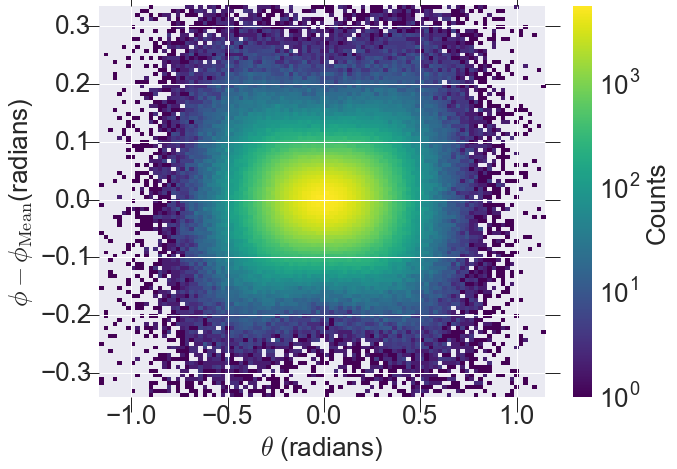

In [4]:
mean=0
std=0.057
num_std=6
num_bins=100
phi_bins=np.arange(mean-num_std*std,mean+num_std*std,2*num_std*std/num_bins)
mean=0
std=0.195
num_std=6
num_bins=100
theta_bins=np.arange(mean-num_std*std,mean+num_std*std,2*num_std*std/num_bins)
bins=[theta_bins,phi_bins]

fig1 = plt.figure(figsize=[10,7])
ax = fig1.add_subplot(1, 1, 1)
plt.hist2d(x, y, bins=bins, cmap=my_cmap, norm=LogNorm())
cb=plt.colorbar(label="Counts")
font = matplotlib.font_manager.FontProperties(family='sans-serif', size=26)
cb.ax.yaxis.label.set_font_properties(font)
cb.ax.tick_params(labelsize=26)
plt.tick_params('both', length=15, width=1, which='major')
plt.tick_params('both', length=7, width=1, which='minor')
plt.tick_params(labelsize=26)
plt.xlabel(r"$\theta}$ (radians)", fontsize=26)
plt.ylabel(r"$\phi - \phi_{\rm{Mean}}$(radians)", fontsize=26)
plt.grid(True)
plt.savefig("/home/mjbales/work/nedm/graphs/PhiThetaCorrelation.eps", bbox_inches='tight', dpi=200)
plt.show()

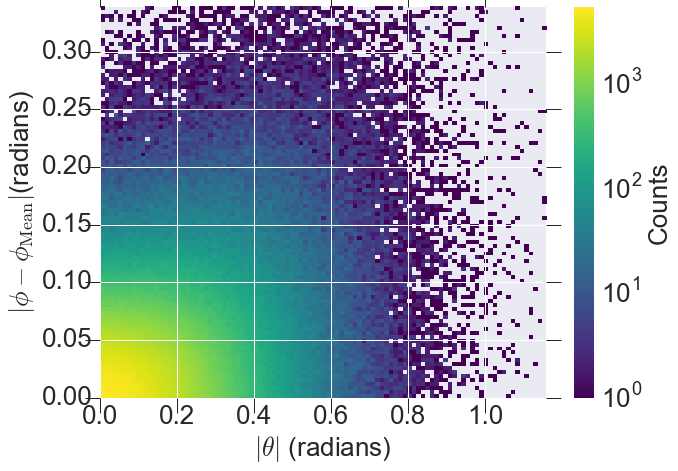

In [4]:
w=map(lambda x:abs(x),x)
z=map(lambda x:abs(x),y)
mean=0
std=0.057
num_std=6
num_bins=100
phi_bins=np.arange(0,mean+num_std*std,num_std*std/num_bins)
mean=0
std=0.195
num_std=6
num_bins=100
theta_bins=np.arange(0,mean+num_std*std,num_std*std/num_bins)
bins=[theta_bins,phi_bins]

fig1 = plt.figure(figsize=[10,7])
ax = fig1.add_subplot(1, 1, 1)
plt.hist2d(w, z, bins=bins, cmap=my_cmap, norm=LogNorm())
cb=plt.colorbar(label="Counts")
font = matplotlib.font_manager.FontProperties(family='sans-serif', size=26)
cb.ax.yaxis.label.set_font_properties(font)
cb.ax.tick_params(labelsize=26)
plt.tick_params('both', length=15, width=1, which='major')
plt.tick_params('both', length=7, width=1, which='minor')
plt.tick_params(labelsize=26)
plt.xlabel(r"$|\theta |$ (radians)", fontsize=26)
plt.ylabel(r"$|\phi - \phi_{\rm{Mean}}|$(radians)", fontsize=26)
plt.grid(True)
plt.savefig("/home/mjbales/work/nedm/graphs/PhiThetaCorrelation_Alt.pdf", bbox_inches='tight', dpi=600)
plt.show()

In [10]:
m=np.asarray(x[:100000])
n=np.asarray(y[:100000])
data_xy=np.array([m,n]).T
num_std=6
num_bins=100
phi_std=0.057
theta_std=0.195
xlim=[-num_std*theta_std,num_std*theta_std]
ylim=[-num_std*phi_std,num_std*phi_std]

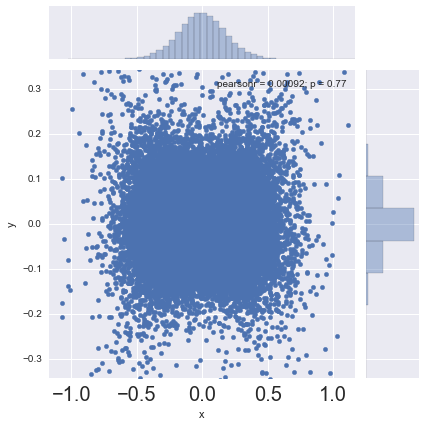

In [11]:
df = pd.DataFrame(data_xy, columns=["x", "y"])
sns.jointplot(x="x", y="y", data=df,xlim=xlim,ylim=ylim)
# sns.jointplot(x="x", y="y", data=df, kind="kde")

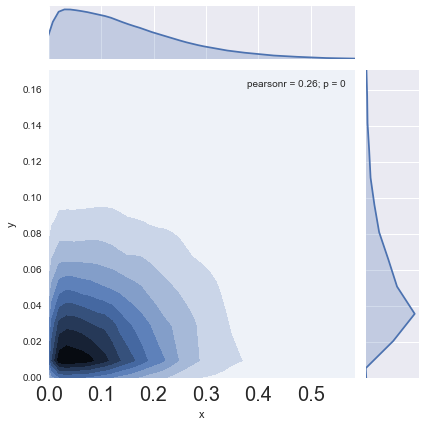

In [16]:
m=np.asarray(w[:100000])
n=np.asarray(z[:100000])
xlim=[0,3*theta_std]
ylim=[0,3*phi_std]
data_xy=np.array([m,n]).T
df = pd.DataFrame(data_xy, columns=["x", "y"])
the_plot = sns.jointplot(x="x", y="y", data=df, kind="kde",xlim=xlim,ylim=ylim)
the_plot.savefig("/home/mjbales/work/nedm/graphs/PhiThetaCorrelation_Alt2.pdf", dpi=600)


In [19]:
print np.corrcoef(w, z)

[[ 1.          0.27199771]
 [ 0.27199771  1.        ]]
